# Maximum and Minimum Temperature Trends at Sondrestrom, GL

### Overview

The following is an analysis of the maximum and minimum temperature trends reported at a weather station on the Southwest coast of Greenland. I chose this site to study for two reasons. First, because the Greenland ice sheet is of critical importance to the Earth's systems. Increased warming here could result in melting of the Greenland ice sheet, which would cause sea level rise and potentially a shutdown of the Gulf Stream, an oceanic current which distributes heat around the globe. The second reason I chose this site is for its location at a far Northern latitude. Warming trends are amplified closer to the poles, so it might be easier to observe them in the far North. I studied the maximum and minimum temperature trends in degrees Celsius, because this will show us how many days out of the year had a temperature either above or below freezing. 

This station is near the coast, about 50m above sea level. Ideally I would have liked to have found data from a station further inland on or near the ice sheet, where the temperature influence of the ocean would also be less important. However, presumably due to Greenland's extreme conditions, the majority of consistent weather observations were either near the coast or lacking complete data. In my search, Sondrestrom was the station that best balanced distance from the coast and completeness of data.

### Data Description

The Global Historical Climatology Network Daily (GHCNd) is a continuously updated database hosted by NCEI, which combines data from 30 different datasets, together representing over 90,000 measuring stations worldwide. A large portion of the stations only monitor precipitation, however some stations do record other observations such as temperature and snowfall. Maximum temperature units are Farenheit or Celsius depending on user preference. The compilation of datasets is useful for studying global climate because it brings together data from many different geographic locations. The availability of historical data in many of these locations also enables tracking of trends over time, which is essential for climate research.

Citation:

Menne, Matthew J., Imke Durre, Bryant Korzeniewski, Shelley McNeill, Kristy Thomas, Xungang Yin, Steven Anthony, Ron Ray, Russell S. Vose, Byron E.Gleason, and Tamara G. Houston (2012): Global Historical Climatology Network - Daily (GHCN-Daily), Version 3. [Boulder, CO station USC00050848 Observed Temperature Data]. NOAA National Climatic Data Center. doi:10.7289/V5D21VHZ [11/4/24].

Matthew J. Menne, Imke Durre, Russell S. Vose, Byron E. Gleason, and Tamara G. Houston, 2012: An Overview of the Global Historical Climatology Network-Daily Database. J. Atmos. Oceanic Technol., 29, 897-910. doi:10.1175/JTECH-D-11-00103.1.

### Site Description

Sondrestrom air force base was founded in 1941, at the east end of Kangerlussaq fjord, on Greenland's west coast. It has served both as a military airbase and a civilian airport, occasionally changing ownership between the US and Denmark. The US withdrew most of its personnel from the base after the fall of the Soviet Union, and it is currently run by Danish contractors. Also near the airbase is the Sondrestrom Upper Atmosphere Research Facility, operated by the US National Science Foundation and the Danish Meteorological Institute, and possessing a 32 meter Incoherent Scatter radar dish for studying the ionosphere.

Source:

https://sondrestrom.com/


### Methods

Following is my coding workflow for examining temperature trends at Sondrestrom. The project was completed using Github Codespaces. First, Python packages were imported which would allow me to work with the data, conduct statistical analysis, and make plots. Next, I wrote code defining the address of the data, downloading it, loading it into codespaces, and reading it using Pandas. I printed out the data, selecting only the variables I was interested in (maximum and minimum termperature, as well as precipitation since this could be interesting to plot in a future analysis). Following this I looked at the data from a number of different 'angles', including a histogram and a resampled plot showing maximum yearly max and min values, rather than daily which is difficult to read as a linear plot. I converted the units from Farenheit to Celsius, since this makes it easier to see whether the temperature is above or below freezing. Finally I resampled the data again to show mean annual max and min temperatures, cleaned the data of any 'NaN' (missing) values, and plotted linear regressions for both sets of mean annual minimum and maximum temperatures.

In [4]:
import pandas as pd
import holoviews as hv
import hvplot.pandas
# Advanced options on matplotlib/seaborn/pandas plots
import matplotlib.pyplot as plt
# Common statistical plots for tabular data
import seaborn as sns
# Fit an OLS linear regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import numpy as np
import statsmodels.api as sm


In [5]:
# Define data download
greenland_url = (
    'https://www.ncei.noaa.gov/access/services/da'f'ta/v1'
    '?dataset=daily-summaries'
    '&dataTypes=TMIN,PRCP,TMAX'
    '&stations=GLW00016504'
    '&units=standard'
    '&startDate=1947-10-01'
    '&endDate=2024-09-18')
greenland_url

'https://www.ncei.noaa.gov/access/services/data/v1?dataset=daily-summaries&dataTypes=TMIN,PRCP,TMAX&stations=GLW00016504&units=standard&startDate=1947-10-01&endDate=2024-09-18'

In [6]:
# Import data into Python from NCEI API
greenland_climate_df = pd.read_csv(
    greenland_url,
    index_col='DATE',
    parse_dates=True,
    na_values=['NaN'])
greenland_climate_df

,STATION,PRCP,TMAX,TMIN
DATE,,,,
1947-11-22,GLW00016504,0.00,-3.0,-7.0
1947-12-05,GLW00016504,0.00,-1.0,-8.0
1949-01-01,GLW00016504,0.00,9.0,-19.0
1949-01-02,GLW00016504,0.06,10.0,-2.0
1949-01-03,GLW00016504,0.04,11.0,-10.0
...,...,...,...,...
2020-12-28,GLW00016504,NaN,47.0,8.0
2020-12-29,GLW00016504,NaN,31.0,17.0
2020-12-30,GLW00016504,NaN,34.0,23.0


In [7]:
greenland_climate_df = greenland_climate_df[['PRCP', 'TMIN', 'TMAX']]
greenland_climate_df

,PRCP,TMIN,TMAX
DATE,,,
1947-11-22,0.00,-7.0,-3.0
1947-12-05,0.00,-8.0,-1.0
1949-01-01,0.00,-19.0,9.0
1949-01-02,0.06,-2.0,10.0
1949-01-03,0.04,-10.0,11.0
...,...,...,...
2020-12-28,NaN,8.0,47.0
2020-12-29,NaN,17.0,31.0
2020-12-30,NaN,23.0,34.0


<Axes: xlabel='DATE'>

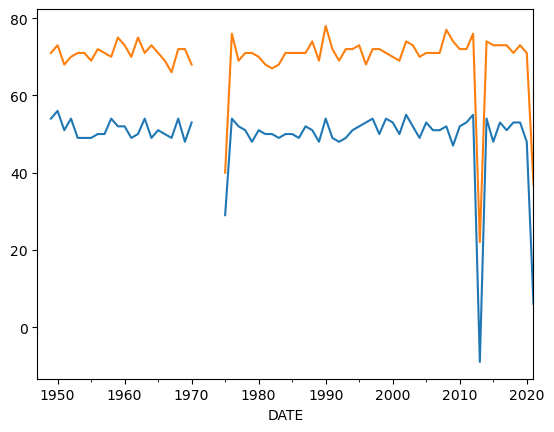

In [8]:
greenland_climate_df.TMIN.resample('YS').max().plot()
greenland_climate_df.TMAX.resample('YS').max().plot()
# greenland_climate_df.PRCP.resample('YS').max().plot()

In [9]:
# store the df for later use.

%store greenland_climate_df

Stored 'greenland_climate_df' (DataFrame)


<Axes: ylabel='Frequency'>

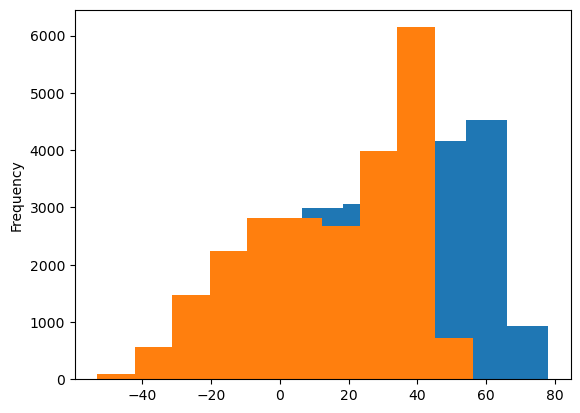

In [10]:
greenland_climate_df.TMAX.plot.hist()
greenland_climate_df.TMIN.plot.hist()
# greenland_climate_df.PRCP.plot.hist()

In [11]:
# define a new dataframe, renaming the columns to include correct units.

greenland_climate_df_u = greenland_climate_df.rename(columns={
    'TMAX': 'TMAX_F',
    'TMIN': 'TMIN_F'
})

greenland_climate_df_u

,PRCP,TMIN_F,TMAX_F
DATE,,,
1947-11-22,0.00,-7.0,-3.0
1947-12-05,0.00,-8.0,-1.0
1949-01-01,0.00,-19.0,9.0
1949-01-02,0.06,-2.0,10.0
1949-01-03,0.04,-10.0,11.0
...,...,...,...
2020-12-28,NaN,8.0,47.0
2020-12-29,NaN,17.0,31.0
2020-12-30,NaN,23.0,34.0


In [12]:
# define the df as a function that converts Farenheit to Celsius.

#greenland_climate_df_u['TMIN_C'] = (greenland_climate_df_u['TMIN_F']-32)*5/9
greenland_climate_df_u['TMAX_C'] = (greenland_climate_df_u['TMAX_F']-32)*5/9
greenland_climate_df_u['TMIN_C'] = (greenland_climate_df_u['TMIN_F']-32)*5/9
greenland_climate_df_u

,PRCP,TMIN_F,TMAX_F,TMAX_C,TMIN_C
DATE,,,,,
1947-11-22,0.00,-7.0,-3.0,-19.444444,-21.666667
1947-12-05,0.00,-8.0,-1.0,-18.333333,-22.222222
1949-01-01,0.00,-19.0,9.0,-12.777778,-28.333333
1949-01-02,0.06,-2.0,10.0,-12.222222,-18.888889
1949-01-03,0.04,-10.0,11.0,-11.666667,-23.333333
...,...,...,...,...,...
2020-12-28,NaN,8.0,47.0,8.333333,-13.333333
2020-12-29,NaN,17.0,31.0,-0.555556,-8.333333
2020-12-30,NaN,23.0,34.0,1.111111,-5.000000


In [13]:
greenland_climate_df = greenland_climate_df_u[['TMAX_C', 'TMIN_C']]
# greenland_climate_df = greenland_climate_df_u[['TMIN_C']]
greenland_climate_df

,TMAX_C,TMIN_C
DATE,,
1947-11-22,-19.444444,-21.666667
1947-12-05,-18.333333,-22.222222
1949-01-01,-12.777778,-28.333333
1949-01-02,-12.222222,-18.888889
1949-01-03,-11.666667,-23.333333
...,...,...
2020-12-28,8.333333,-13.333333
2020-12-29,-0.555556,-8.333333
2020-12-30,1.111111,-5.000000


<Axes: title={'center': 'Maximum Temperature in Sondrestrom over Time'}, xlabel='Date', ylabel='Maximum Temperature (C)'>

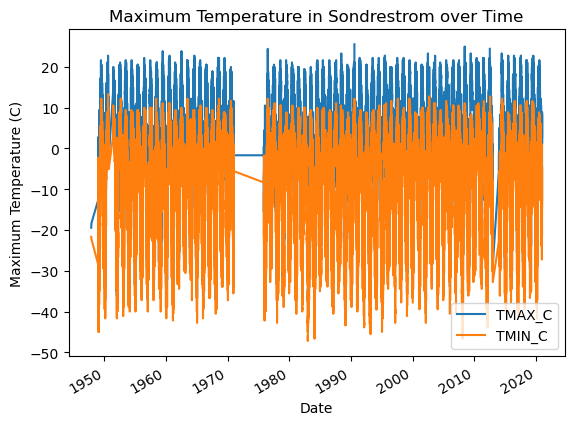

In [14]:
# Plot the data using .plot
# greenland_climate_df.plot(
#     y='PRCP',
#     title='Precipitation in Sondrestrom over Time',
#     xlabel='Date',
#     ylabel='Precipitation (in.)')
# Plot the data using .plot
greenland_climate_df.plot(
    y=['TMAX_C', 'TMIN_C'],
    title='Maximum Temperature in Sondrestrom over Time',
    xlabel='Date',
    ylabel='Maximum Temperature (C)'
    )

In [15]:
gl_ann_climate_df = greenland_climate_df.resample('YS').mean()
gl_ann_climate_df

,TMAX_C,TMIN_C
DATE,,
1947-01-01,-18.888889,-21.944444
1948-01-01,NaN,NaN
1949-01-01,-3.070015,-11.859970
1950-01-01,1.064306,-7.413512
1951-01-01,3.009024,-4.455725
...,...,...
2017-01-01,1.192449,-9.058770
2018-01-01,-0.575342,-9.972603
2019-01-01,2.750230,-8.100704


<Axes: title={'center': 'Average Annual Max and Min Temperature in Sondrestrom over Time'}, xlabel='Date', ylabel='Temperature ($^\\circ$C)'>

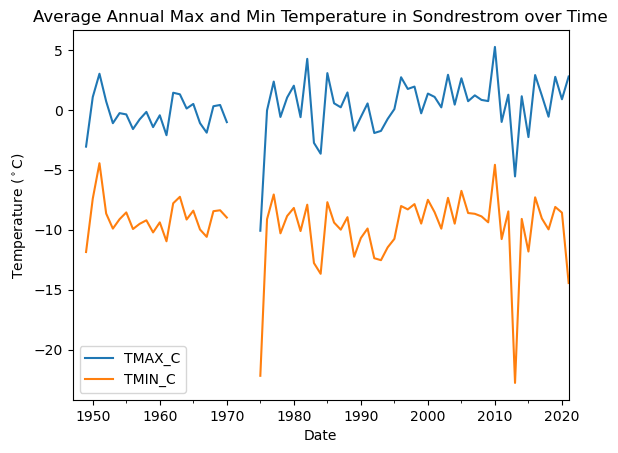

In [16]:
# Plot the annual data
gl_ann_temp_plot = gl_ann_climate_df.plot(
    y=['TMAX_C', 'TMIN_C'],
    title='Average Annual Max and Min Temperature in Sondrestrom over Time',
    xlabel='Date',
    ylabel='Temperature ($^\circ$C)')
gl_ann_temp_plot

###Observations about the data:
*There's a gap in the data from 1970-1975
*There appear to be anomalously low temperatures recorded in 1975. These could be a result of anomalously cold weather patterns, or they could be a result of data collection errors.

In [17]:
# Plot the annual data interactively
temp_interactive_plot = gl_ann_climate_df.hvplot(
    y=['TMAX_C', 'TMIN_C'],
    title='Average Annual Maximum Temperature in Sondrestrom over Time',
    xlabel='Date',
    ylabel='Temperature (Degrees Celsius)')
temp_interactive_plot

/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


:NdOverlay   [Variable]
   :Curve   [DATE]   (value)

I plotted both the Maximum and Minimum temperatures so that it's possible to get a sense of when snow and ice might be accumulating on the ice sheet versus when it would be melting. The lowest recorded minimum average temperature value was 22.778 degrees Celsius, and the highest recorded maximum average temperature was 5.245 degrees Celsius.

In [18]:
hv.save(temp_interactive_plot, 'Sondrestrom_ann_temp_plot.html')

/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type
/opt/conda/lib/python3.10/site-packages/holoviews/core/data/pandas.py:39: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return dataset.data.dtypes[idx].type


<Axes: xlabel='DATE'>

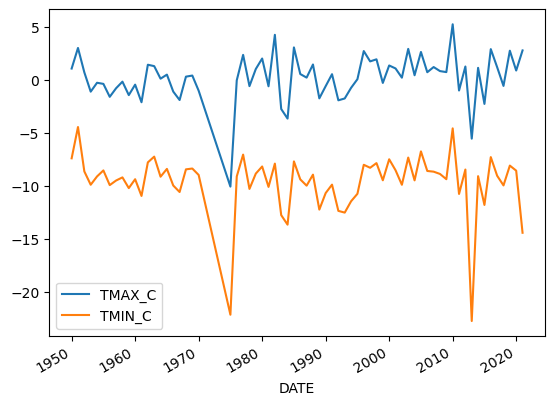

In [19]:
# filter the data
include = (
    gl_ann_climate_df[['TMAX_C', 'TMIN_C']]
    .resample('YS')
    .count()
     / 365
    > 0.001
)

# Assuming ann_climate_ is your DataFrame with 'Year' as the index and 'Temperature' as the column
ann_climate_df_clean = (
    gl_ann_climate_df
    [include]
    .loc['1950':]
    .dropna()
)    
# ann_climate_df_clean.plot(y=['TMAX_C', 'TMIN_C'])


# gl_ann_climate_df[include].plot(
#     y=['TMAX_C', 'TMIN_C'],
#     title='Filtered Maximum and Minimum Temperatures Over Time',
#     xlabel='Date',
#     ylabel='Temperature (C)')

ann_climate_df_clean.plot(y=['TMAX_C', 'TMIN_C'])


<Axes: ylabel='Frequency'>

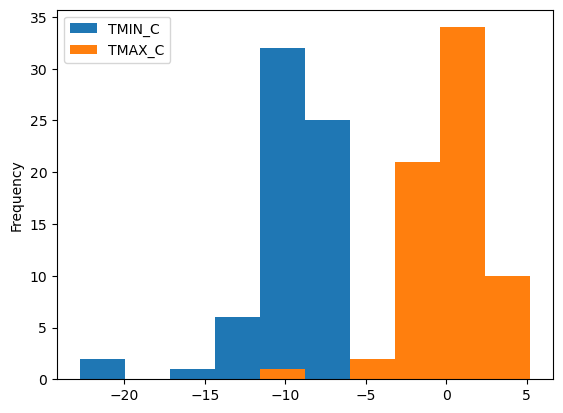

In [20]:
ann_climate_df_clean[['TMIN_C', 'TMAX_C']].plot.hist()

In [28]:
# Reshape date to be a 2D array for scikit-learn
predictor = ann_climate_df_clean.index.year.values.reshape(-1, 1)
observed_TMAX = ann_climate_df_clean['TMAX_C'].values
observed_TMIN = ann_climate_df_clean['TMIN_C'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(predictor, observed_TMAX)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


Slope: 0.021518507097967977
Intercept: -42.53200313815284


In [30]:
observed_TMIN = ann_climate_df_clean['TMIN_C'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(predictor, observed_TMAX)

# Get the slope and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Print the results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

Slope: 0.0
Intercept: -42.53200313815283


In [27]:
print(observed)

[[  1.06430606  -7.41351241]
 [  3.00902425  -4.45572476]
 [  0.70431087  -8.65057681]
 [ -1.11719939  -9.9086758 ]
 [ -0.27701674  -9.12328767]
 [ -0.38356164  -8.55707763]
 [ -1.60595021  -9.94231937]
 [ -0.79299848  -9.50837139]
 [ -0.17351598  -9.21461187]
 [ -1.44292237 -10.22526636]
 [ -0.45537341  -9.38676381]
 [ -2.11719939 -10.96499239]
 [  1.42465753  -7.79604262]
 [  1.29375951  -7.25418569]
 [  0.10777171  -9.14996964]
 [  0.49162861  -8.41248097]
 [ -1.11111111  -9.98173516]
 [ -1.90715373 -10.59512938]
 [  0.29984779  -8.45509893]
 [  0.40334855  -8.37747336]
 [ -1.02739726  -8.9847793 ]
 [-10.08454106 -22.18253968]
 [ -0.04870624  -9.12698413]
 [  2.35616438  -7.06196581]
 [ -0.59590317 -10.30105525]
 [  1.02387511  -8.85521886]
 [  2.01217656  -8.18417047]
 [ -0.61202686 -10.11141636]
 [  4.25099206  -7.91152263]
 [ -2.75696446 -12.77934272]
 [ -3.66104869 -13.67724868]
 [  3.05958132  -7.70359848]
 [  0.54613936  -9.40135426]
 [  0.20892688  -9.99535747]
 [  1.44818976

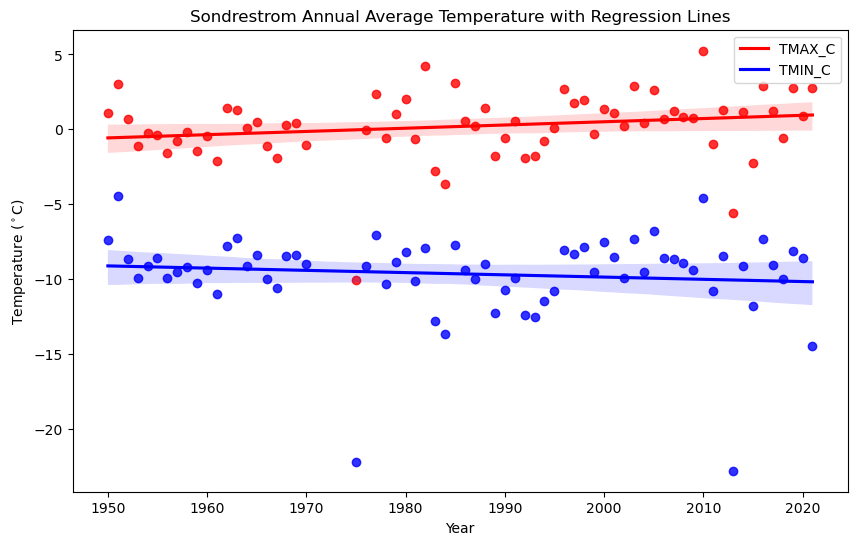

In [22]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))

# Plot TMAX_C regression line
sns.regplot(
    x=ann_climate_df_clean.index.year,
    y=ann_climate_df_clean['TMAX_C'],
    ax=ax,  # Use the same axes for both plots
    scatter_kws={'color': 'red'},  # Optional: Customize scatter points
    line_kws={'color': 'red', 'label': 'TMAX_C'}  # Optional: Customize the line
)

# Plot TMIN_C regression line
sns.regplot(
    x=ann_climate_df_clean.index.year,
    y=ann_climate_df_clean['TMIN_C'],
    ax=ax,  # Use the same axes
    scatter_kws={'color': 'blue'},  # Optional: Customize scatter points
    line_kws={'color': 'blue', 'label': 'TMIN_C'}  # Optional: Customize the line
)

# Set plot labels and title
ax.set(
    title='Sondrestrom Annual Average Temperature with Regression Lines',
    xlabel='Year',
    ylabel='Temperature ($^\circ$C)'
)

# Display legend
ax.legend()

# Display the plot
plt.show()


### Results and Discussion

The analysis of mean annual minimum and maxumum temperatures in Sondrestrom yielded two linear regression lines, one each for mean annual minimum and maximum temperature. Interestingly, the lines do not show uniform warming, but rather an increase in the *variability* of temperatures. This is consistent with changes in other parts of the world, where increasing variability has been observed and has led to, for example, extreme weather events such as floods and hurricanes. In this case, it's difficult to say for certain whether the observed trends would lead to increased melting of Greenland ice sheets, sea level rise, or threats to the Gulf Stream. What the results show is that the average yearly extremes in temperature are getting more extreme, meaning warmer warm periods and colder cold periods.

The scope of this project is limited by time, however a number of topics would be interesting to examine for continued analysis. Given more time, I would like to plot other data from the same weather station, which also monitored precipitation and accumulation of snow on the ground. By plotting temperatures along with precipitation and snow accumulation, it would be possible to get a more complete picture of the conditions which could lead to accumulation or melting of the Greenland ice sheet. I would also like to do a deeper search, perhaps from some other datasets and sources, to see if any data exists monitoring these variables further inland away from the temperature infulence of the ocean and closer to the ice sheets themselves.

In [29]:
# Note: This block of code is supposed to print an analysis of the linear regression, but it's not working. I may be able to come back and fix it later.

# Add a constant term to the independent variable (for intercept)
predictor = sm.add_constant(predictor)

# Fit the OLS model
model = sm.OLS(observed_TMAX, predictor).fit()

# Print the model summary
print(model.summary())

# Test

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.028
Method:                 Least Squares   F-statistic:                     2.900
Date:                Fri, 13 Dec 2024   Prob (F-statistic):             0.0933
Time:                        22:19:00   Log-Likelihood:                -149.16
No. Observations:                  68   AIC:                             302.3
Df Residuals:                      66   BIC:                             306.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -42.5320     25.099     -1.695      0.0

In [31]:
# Note: This block of code is supposed to print an analysis of the linear regression, but it's not working. I may be able to come back and fix it later.

# Add a constant term to the independent variable (for intercept)
predictor = sm.add_constant(predictor)

# Fit the OLS model
model = sm.OLS(observed_TMIN, predictor).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8245
Date:                Fri, 13 Dec 2024   Prob (F-statistic):              0.367
Time:                        22:22:05   Log-Likelihood:                -167.13
No. Observations:                  68   AIC:                             338.3
Df Residuals:                      66   BIC:                             342.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.0288     32.690      0.613      0.5